# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [104]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities1.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [107]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

clouds = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []
citydf = []
# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
print('-----------------------------')
i = 1
j = 1
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == '404':
        print('City not found. Skipping...')
   
    else:
        citydf.append(city)
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {i} of set {j} | {city}")
        i = i + 1
        if i == 51:
            i = 1
            j = j+1

print('-----------------------------')
print('Data retrieval complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | hilo
Processing Record 2 of set 1 | jalu
Processing Record 3 of set 1 | areka
Processing Record 4 of set 1 | olafsvik
Processing Record 5 of set 1 | constitucion
Processing Record 6 of set 1 | vaini
Processing Record 7 of set 1 | severo-kurilsk
Processing Record 8 of set 1 | ancud
Processing Record 9 of set 1 | mataura
Processing Record 10 of set 1 | cap malheureux
Processing Record 11 of set 1 | cherskiy
Processing Record 12 of set 1 | saldanha
Processing Record 13 of set 1 | ushuaia
Processing Record 14 of set 1 | ilulissat
Processing Record 15 of set 1 | lasa
Processing Record 16 of set 1 | hidalgotitlan
Processing Record 17 of set 1 | rikitea
Processing Record 18 of set 1 | egvekinot
Processing Record 19 of set 1 | flin flon
Processing Record 20 of set 1 | jangaon
Processing Record 21 of set 1 | poum
Processing Record 22 of set 1 | los llanos de aridane
Processing Record 23 of set 1 | hermanus
Pro

Processing Record 35 of set 4 | ossora
Processing Record 36 of set 4 | resistencia
Processing Record 37 of set 4 | menzelinsk
Processing Record 38 of set 4 | nikolskoye
Processing Record 39 of set 4 | carnarvon
Processing Record 40 of set 4 | hohhot
Processing Record 41 of set 4 | ondjiva
Processing Record 42 of set 4 | torbay
Processing Record 43 of set 4 | bardiyah
Processing Record 44 of set 4 | bonthe
Processing Record 45 of set 4 | garowe
Processing Record 46 of set 4 | galesong
Processing Record 47 of set 4 | lexington
Processing Record 48 of set 4 | kybartai
Processing Record 49 of set 4 | oktyabrskiy
Processing Record 50 of set 4 | anadyr
Processing Record 1 of set 5 | tabuk
Processing Record 2 of set 5 | cidreira
Processing Record 3 of set 5 | yellowknife
Processing Record 4 of set 5 | jepara
Processing Record 5 of set 5 | betanzos
City not found. Skipping...
Processing Record 6 of set 5 | chuy
Processing Record 7 of set 5 | parit buntar
Processing Record 8 of set 5 | lapeer
P

Processing Record 23 of set 8 | clarence town
Processing Record 24 of set 8 | oksfjord
Processing Record 25 of set 8 | marrakesh
Processing Record 26 of set 8 | begoro
Processing Record 27 of set 8 | ponta do sol
Processing Record 28 of set 8 | tuktoyaktuk
Processing Record 29 of set 8 | meadow lake
Processing Record 30 of set 8 | mogadishu
Processing Record 31 of set 8 | zverinogolovskoye
Processing Record 32 of set 8 | marinette
Processing Record 33 of set 8 | djambala
Processing Record 34 of set 8 | yanam
Processing Record 35 of set 8 | shimoda
Processing Record 36 of set 8 | bani
Processing Record 37 of set 8 | ingham
Processing Record 38 of set 8 | cabo san lucas
Processing Record 39 of set 8 | kuryk
Processing Record 40 of set 8 | cockburn town
Processing Record 41 of set 8 | georgetown
Processing Record 42 of set 8 | luzhou
Processing Record 43 of set 8 | onguday
Processing Record 44 of set 8 | dwarka
Processing Record 45 of set 8 | korla
Processing Record 46 of set 8 | mizan te

In [108]:
weather_dict = {
    'City': citydf,
    'Country': country,
    'Date': date,
    'lat': lat,
    'Lng': lon,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Date,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,hilo,US,1599516657,19.73,-155.09,29.00,66,90,4.60
1,jalu,LY,1599516712,29.03,21.55,26.84,26,0,3.43
2,areka,ET,1599516713,7.07,37.70,15.35,93,97,0.63
3,olafsvik,IS,1599516713,64.89,-23.71,8.13,74,12,3.68
4,constitucion,CL,1599516713,-35.33,-72.42,11.32,80,83,3.51


In [165]:
clean_df = weather_data.drop(weather_data[(weather_data['Humidity'] > 100)].index)
clean_df
clean_df.to_csv('../output_data/cities1.csv')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pimentel
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | pangai
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | watsa
Processing Record 14 of Set 1 | rosetta
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

Processing Record 38 of Set 4 | tres picos
Processing Record 39 of Set 4 | saint-francois
Processing Record 40 of Set 4 | bubaque
Processing Record 41 of Set 4 | mackay
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | bang saphan
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | santa isabel
Processing Record 49 of Set 4 | turukhansk
Processing Record 0 of Set 5 | saurimo
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | ambulu
Processing Record 3 of Set 5 | olafsvik
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | sobolevo
Processing Record 8 of Set 5 | tateyama
Processing Record 9 of Set 5 | shambu
Processing Record 10 of Set 5 | dingle
Processing Record 11 of Set 5 | nizhneyansk
City not found. Ski

Processing Record 28 of Set 8 | mongomo
Processing Record 29 of Set 8 | hunza
City not found. Skipping...
Processing Record 30 of Set 8 | bow island
Processing Record 31 of Set 8 | moerai
Processing Record 32 of Set 8 | xichang
Processing Record 33 of Set 8 | sakhnovshchyna
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | santa rosa
Processing Record 36 of Set 8 | severo-yeniseyskiy
Processing Record 37 of Set 8 | madera
Processing Record 38 of Set 8 | rizhao
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | bani
Processing Record 41 of Set 8 | awjilah
Processing Record 42 of Set 8 | miles city
Processing Record 43 of Set 8 | ulaanbaatar
Processing Record 44 of Set 8 | lagoa
Processing Record 45 of Set 8 | syasstroy
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | east london
Processing Record 48 of Set 8 | karakol
Processing Record 49 of Set 8 | yeletskiy
City not found. Skipping...
Processing Record 0 of Set 9 | andr

Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | adeje
Processing Record 16 of Set 12 | simpang
Processing Record 17 of Set 12 | athabasca
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | bilibino
Processing Record 20 of Set 12 | sayyan
Processing Record 21 of Set 12 | figline valdarno
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kapit
Processing Record 24 of Set 12 | erenhot
Processing Record 25 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 26 of Set 12 | toftir
City not found. Skipping...
Processing Record 27 of Set 12 | agdam
Processing Record 28 of Set 12 | indianola
Processing Record 29 of Set 12 | honiton
Processing Record 30 of Set 12 | batemans bay
Processing Record 31 of Set 12 | namtsy
Processing Record 32 of Set 12 | bonoua
Processing Record 33 of Set 12 | aracati
Processing Record 34 of Set 12 | mareeba
Processing Record 35 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

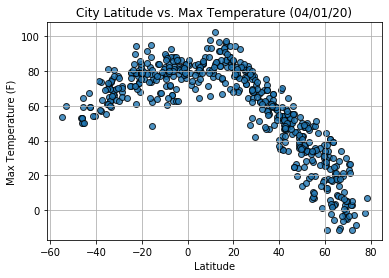

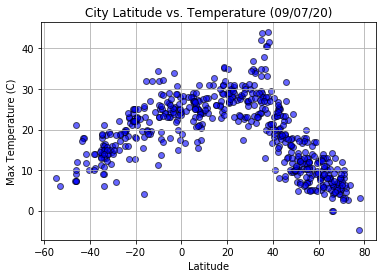

In [110]:
x_values = clean_df['lat']
y_values = clean_df['Max Temp']
plt.scatter(x_values,y_values,marker="o",facecolors="blue", edgecolors="black", alpha=0.60)
plt.title('City Latitude vs. Temperature (09/07/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

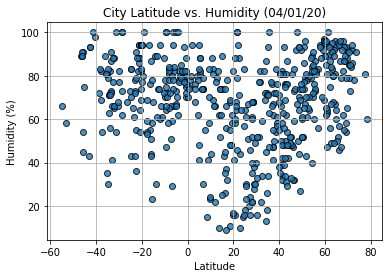

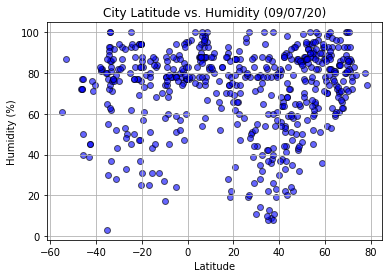

In [111]:

x_values = clean_df['lat']
y_values = clean_df['Humidity']
plt.scatter(x_values,y_values,marker="o",facecolors="blue", edgecolors="black", alpha=0.60)
plt.title('City Latitude vs. Humidity (09/07/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

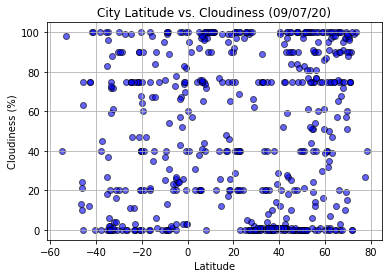

In [112]:
x_values = clean_df['lat']
y_values = clean_df['Cloudiness']
plt.scatter(x_values,y_values,marker="o",facecolors="blue", edgecolors="black", alpha=0.60)
plt.title('City Latitude vs. Cloudiness (09/07/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

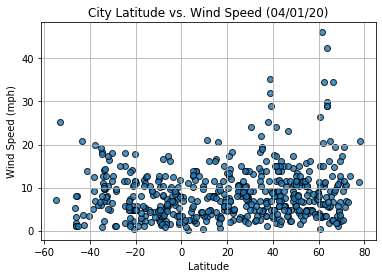

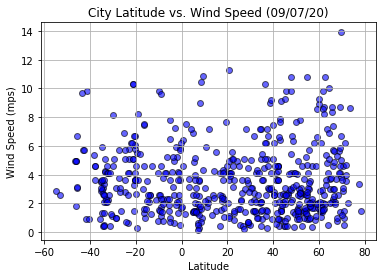

In [113]:
x_values = clean_df['lat']
y_values = clean_df['Wind Speed']
plt.scatter(x_values,y_values,marker="o",facecolors="blue", edgecolors="black", alpha=0.60)
plt.title('City Latitude vs. Wind Speed (09/07/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.grid()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [155]:
# Create Northern and Southern Hemisphere DataFrames
south = weather_data.drop(weather_data[(weather_data['lat'] >= 0)].index)
north = weather_data.drop(weather_data[(weather_data['lat'] < 0)].index)
north


,City,Country,Date,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,hilo,US,1599516657,19.73,-155.09,29.00,66,90,4.60
1,jalu,LY,1599516712,29.03,21.55,26.84,26,0,3.43
2,areka,ET,1599516713,7.07,37.70,15.35,93,97,0.63
3,olafsvik,IS,1599516713,64.89,-23.71,8.13,74,12,3.68
6,severo-kurilsk,RU,1599516714,50.68,156.12,12.61,88,21,4.98
...,...,...,...,...,...,...,...,...,...
543,kuala selangor,MY,1599516876,3.35,101.25,25.56,100,20,3.73
546,sisimiut,GL,1599516877,66.94,-53.67,4.61,71,68,1.99
547,asyut,EG,1599516877,27.18,31.18,29.00,48,0,5.10
548,pilibanga,IN,1599516878,29.49,74.08,31.34,52,0,2.77


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


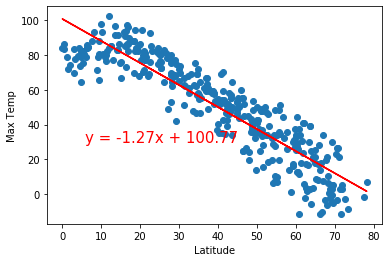

The correlation between both factors is -0.77


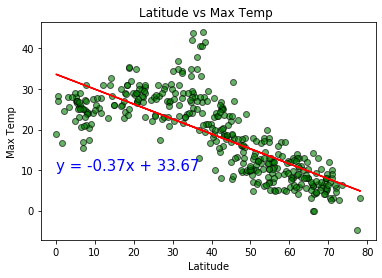

The correlation between both factors is 0.06


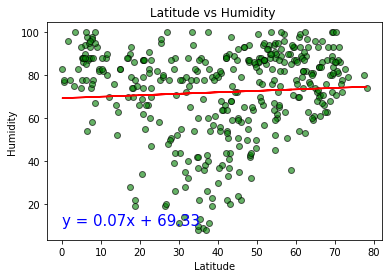

The correlation between both factors is 0.01


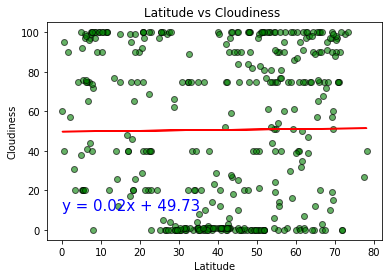

The correlation between both factors is 0.1


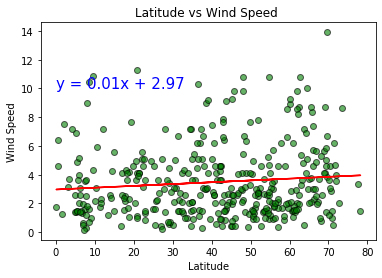

In [158]:
i = 5
while i < 9:
    x_values = north['lat']
    y_values = north.iloc[:,i]
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker="o",facecolors="green", edgecolors="black", alpha=0.60)
    plt.title(f'Latitude vs {north.columns[i]} ')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,10),fontsize=15,color="blue")
    plt.xlabel('Latitude')
    plt.ylabel(north.columns[i])
    plt.show()
    i=1+i
    

The correlation between both factors is 0.73


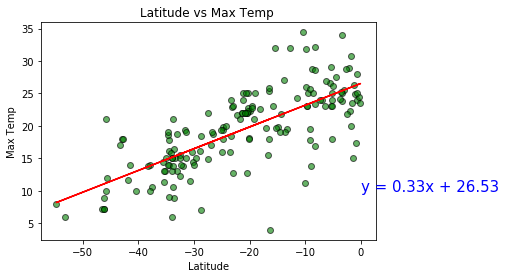

The correlation between both factors is 0.07


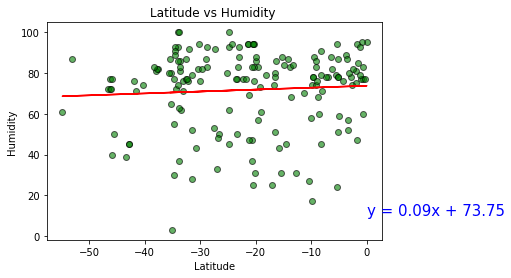

The correlation between both factors is 0.08


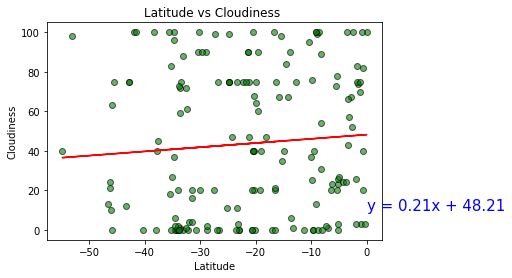

The correlation between both factors is -0.04


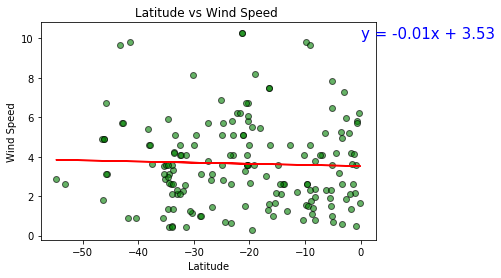

In [162]:
i = 5
while i < 9:
    x_values = south['lat']
    y_values = south.iloc[:,i]
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,marker="o",facecolors="green", edgecolors="black", alpha=0.60)
    plt.title(f'Latitude vs {north.columns[i]} ')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,10),fontsize=15,color="blue")
    plt.xlabel('Latitude')
    plt.ylabel(north.columns[i])
    plt.show()
    i=1+i

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


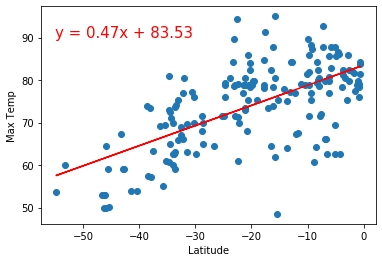

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


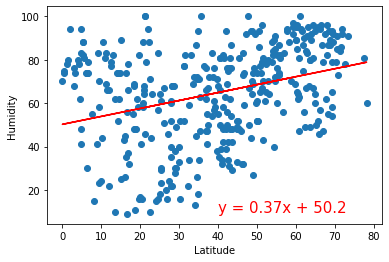

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


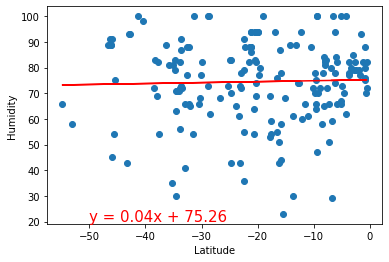

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


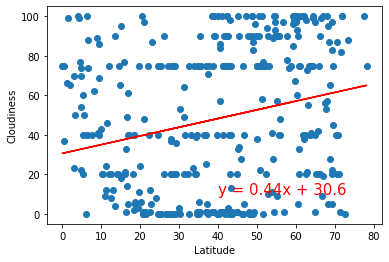

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


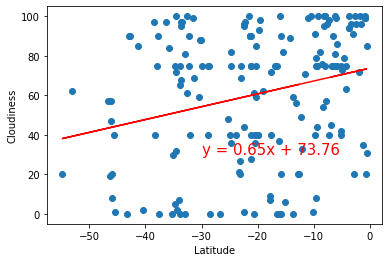

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


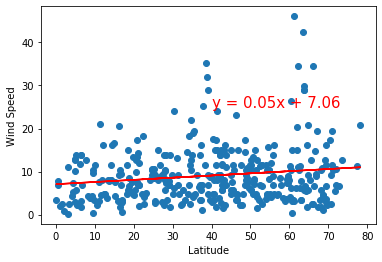

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


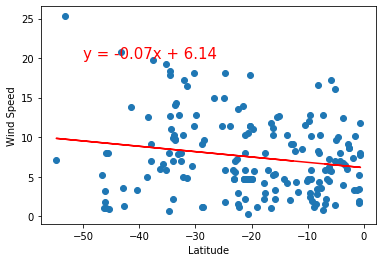